<a href="https://colab.research.google.com/github/ArivalaganRaghavan/Computer-vision-practise/blob/main/CV_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC

Downloading...
From (original): https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC
From (redirected): https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC&confirm=t&uuid=380f8b8e-1199-4a8e-af85-e55c92003fe7
To: /content/clothing-dataset-small.zip
100% 106M/106M [00:03<00:00, 31.5MB/s]


In [2]:
!unzip /content/clothing-dataset-small.zip

Archive:  /content/clothing-dataset-small.zip
   creating: clothing-dataset-small/
  inflating: clothing-dataset-small/.DS_Store  
   creating: clothing-dataset-small/test/
   creating: clothing-dataset-small/test/skirt/
  inflating: clothing-dataset-small/test/skirt/f4b934fc-e326-4f72-b535-53288b8b82d3.jpg  
  inflating: clothing-dataset-small/test/skirt/491982c3-3e90-431e-99e6-b14ecea36384.jpg  
  inflating: clothing-dataset-small/test/skirt/24963db3-649c-4f04-8da3-0375ede8e0a6.jpg  
  inflating: clothing-dataset-small/test/skirt/32b99302-cec7-4dec-adfa-3d4029674209.jpg  
  inflating: clothing-dataset-small/test/skirt/0558b2c5-be00-49de-b27f-8c88114ac36f.jpg  
  inflating: clothing-dataset-small/test/skirt/95e66e02-b4ed-4fe9-b538-db6bac4fb7df.jpg  
  inflating: clothing-dataset-small/test/skirt/2001dec1-1e0a-4c11-9d15-120b019b3dea.jpg  
  inflating: clothing-dataset-small/test/skirt/b0e05193-cc92-4935-88d7-e71a1b19dd4b.jpg  
  inflating: clothing-dataset-small/test/skirt/309829b2-6d1

In [3]:
!gdown https://drive.google.com/drive/folders/1wgRokkvPUoGjsUZqJEhtpJn5e5lDTL4i --folder  # OPTIONAL

Retrieving folder contents
Processing file 1yJT_CluvRxuSiWNnNhPyG5vgon0Re4_t L1_ann_model.ckpt.data-00000-of-00001
Processing file 1BiOY_1SXdkEHQmb0nVWgos0NnOvjQo1f L1_ann_model.ckpt.index
Processing file 1fnyJtYPAit6Nsa9cOD7b5G_8rXRnEv0n L1_cnn_model.ckpt.data-00000-of-00001
Processing file 1pzasWKpoLT-4yUf0ry8r0ykXegRuDzL_ L1_cnn_model.ckpt.index
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1yJT_CluvRxuSiWNnNhPyG5vgon0Re4_t
From (redirected): https://drive.google.com/uc?id=1yJT_CluvRxuSiWNnNhPyG5vgon0Re4_t&confirm=t&uuid=d4001743-a88e-471c-a75e-3fdd4801faef
To: /content/Saved Models/L1_ann_model.ckpt.data-00000-of-00001
100% 607M/607M [00:08<00:00, 67.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BiOY_1SXdkEHQmb0nVWgos0NnOvjQo1f
To: /content/Saved Models/L1_ann_model.ckpt.index
100% 1.68k/1.68k [00:00<00:00, 9.56MB/s]
Downloading...
From (original):

### 0.2 Import Libraries

a. viz libraries like matplotlib, seaborn etc.

b. DL framework like tf, keras etc.

In [4]:
# import common libraries
import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import tensorflow and its modules
import tensorflow as tf
from tensorflow import keras  # this allows <keras.> instead of <tf.keras.>
from tensorflow.keras import layers  # this allows <layers.> instead of <tf.keras.layers.>
tf.keras.utils.set_random_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')


In [5]:
class_dirs = os.listdir("clothing-dataset-small/train")  # list all directories inside "train" folder
image_dict = {}  # dict to store image array(key) for every class(value)
count_dict = {}  # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
  # get list of all path insided the sub directory
  file_paths = glob.glob(f'clothing-dataset-small/train/{cls}/*')
  # count number of files in each class and add it to count_dict
  count_dict[cls] = len(file_paths)
  # select random item from list of image paths
  image_path = random.choice(file_paths)
  # load image using keras utility funtion and save it in image_dict
  image_dict[cls] = tf.keras.utils.load_img(image_path)

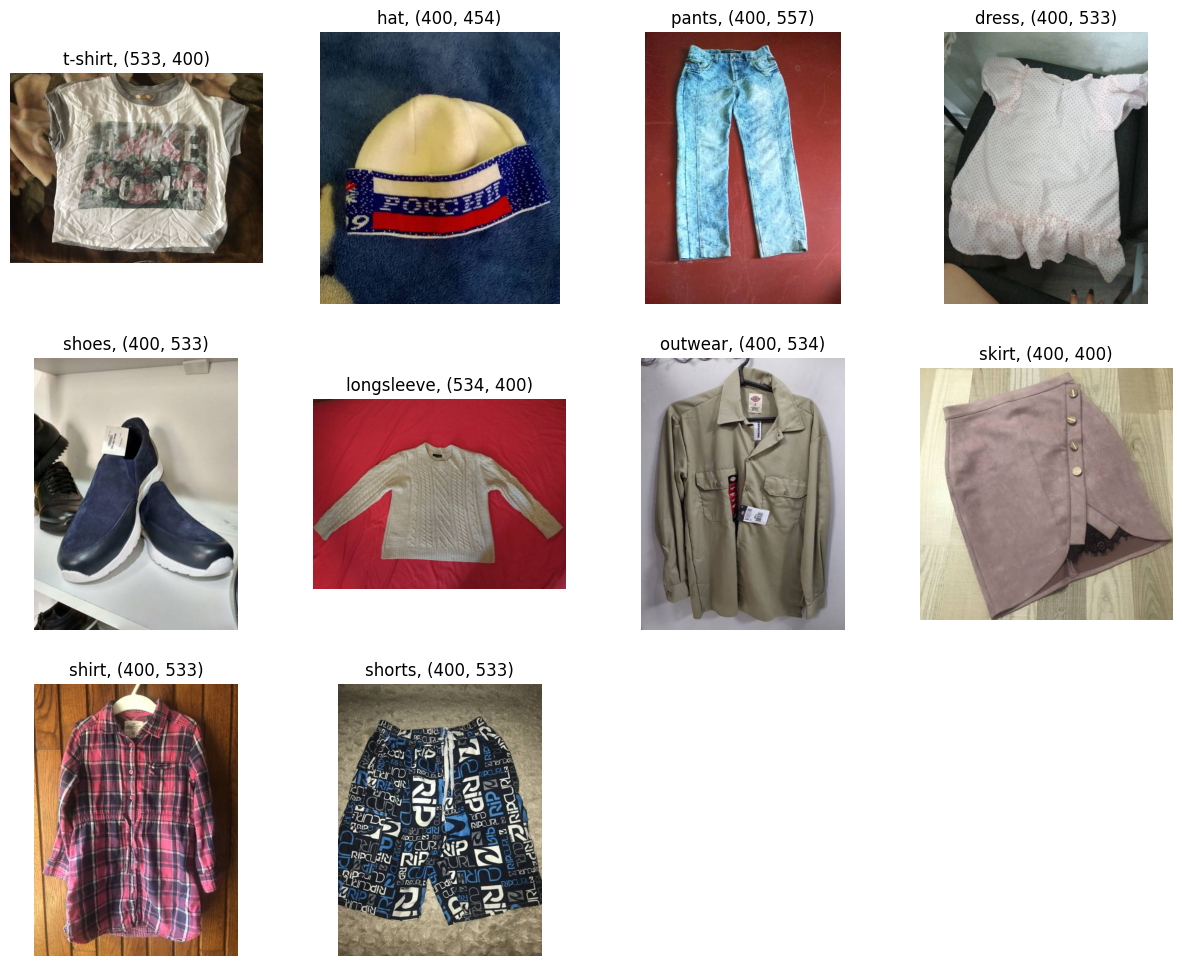

In [6]:
## Viz Random Sample form each class

plt.figure(figsize=(15,12))
# iterate over dictionary items (class label, image array)

for i, (cls,img) in enumerate(image_dict.items()):
  # create a subplot axis
  ax = plt.subplot(3, 4, i + 1)
  # plot each image
  plt.imshow(img)
  # set "class name" along with "image size" as title
  plt.title(f'{cls}, {img.size}')
  plt.axis("off")

Count of training samples per class:
         class  count
0     t-shirt    795
1         hat    123
2       pants    468
3       dress    241
4       shoes    198
5  longsleeve    455
6     outwear    184
7       skirt    112
8       shirt    290
9      shorts    202


<Axes: title={'center': 'Training Data Count per class'}, xlabel='class'>

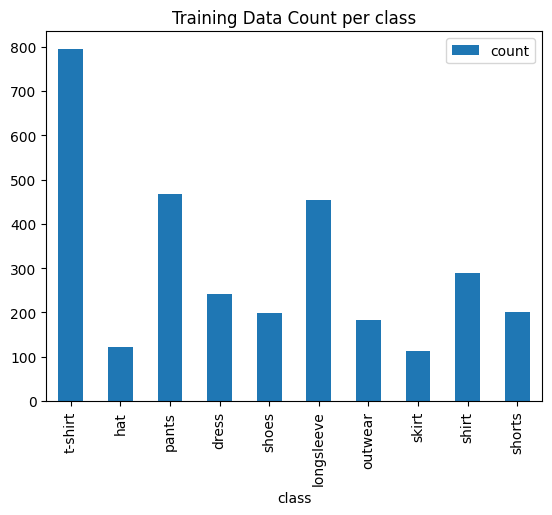

In [7]:
# Let's now plot the data Distribution of traiing Data across Classes

df_count_train = pd.DataFrame({
    "class": count_dict.keys(), # keys of count_dict are class labels
    "count": count_dict.values(), # value of count_dict contain counts of each class
})

print("Count of training samples per class:\n", df_count_train)

# draw a bar plot using pandas in-built plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class")

In [8]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/train", shuffle = True,
)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/validation", shuffle = False,
)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/test", shuffle = False,
)


Loading Train Data...
Found 3068 files belonging to 10 classes.

Loading Validation Data...
Found 341 files belonging to 10 classes.

Loading Test Data...
Found 372 files belonging to 10 classes.


In [9]:
height, width = 128,128 # Optional, not required if we already have re sized the data from 'image_dataset_from_directpory function.

# Data Processing Stage with resizing and rescaling operations
data_preprocess_with_flatten = keras.Sequential(
    name = "data_preprocess_with_flatten",
    layers = [
        layers.Resizing(height, width),
        layers.Rescaling(1./255),
        layers.Flatten(), # Note: We prefer NOT to add `layers.Flatten()` as part of preprocessing layers (rather as model definition itself)!
    ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x,y : (data_preprocess_with_flatten(x),y))

In [10]:
sample = next(iter(train_ds))[0]

print(sample)

tf.Tensor(
[[0.09552696 0.08768383 0.09944853 ... 0.5103711  0.47507697 0.4084103 ]
 [0.19276579 0.04910769 0.06562117 ... 0.4493935  0.12782486 0.18272682]
 [0.63098645 0.5407904  0.6113786  ... 0.93143386 0.939277   0.9353554 ]
 ...
 [0.49344397 0.49344397 0.46207142 ... 0.19694066 0.19694066 0.1655681 ]
 [0.54509807 0.43921572 0.2627451  ... 0.81038606 0.73587626 0.5672488 ]
 [0.15490197 0.04509804 0.10000001 ... 0.2515235  0.07401124 0.13448918]], shape=(32, 49152), dtype=float32)


In [11]:
# Data Processing Stage with resizing and re scaling operations
data_preprocess = keras.Sequential(
    name = "data_preprocess",
    layers = [
        layers.Resizing(height, width),  # Shape Preprocessing
        layers.Rescaling(1./255),  # Value Preprocessing
    ]
)

# Perform Data processing on the train, val, test dataset
train_ds = train_data.map(lambda x,y : (data_preprocess(x),y))
val_ds = val_data.map(lambda x,y : (data_preprocess(x),y))
test_ds = test_data.map(lambda x,y : (data_preprocess(x),y))

### 3.1 Model Architecture of Vanilla NN

- Recall the Neural Network structure covered in earilier lecture,
  
- How Neural Network is made of an Input layer, few Hidden layers and an Output layer with each neuron training on a distinct set of features based on the previous layer’s output.
  
- These complex connection (weight matrix W) between the neurons helps NN to recognize patterns in the data
><img src='https://drive.google.com/uc?id=19BIzu4JiXHNqBgTNXc8PMk_qaYR2nFK5' height=350>

In [12]:
num_classes = 10
hidden_size_1 = 1024
hidden_size_2 = 256

model = keras.Sequential(
    name = "model_ann",
    layers = [
        layers.Flatten(input_shape=(height, width, 3)), # alternatively, input_shape=next(iter(train_ds))[0],shape[1:]
        layers.Dense(units = hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units = hidden_size_2, activation = 'relu'), # hidden layer 2
        layers.Dense(units = num_classes, activation='softmax'), # output layer
              ]
)

In [13]:
model.summary()

Model: "model_ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      50,332,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,597,642 (193.01 MB)

 Trainable params: 50,597,642 (193.01 MB)

 Non-trainable params: 0 (0.00 B)

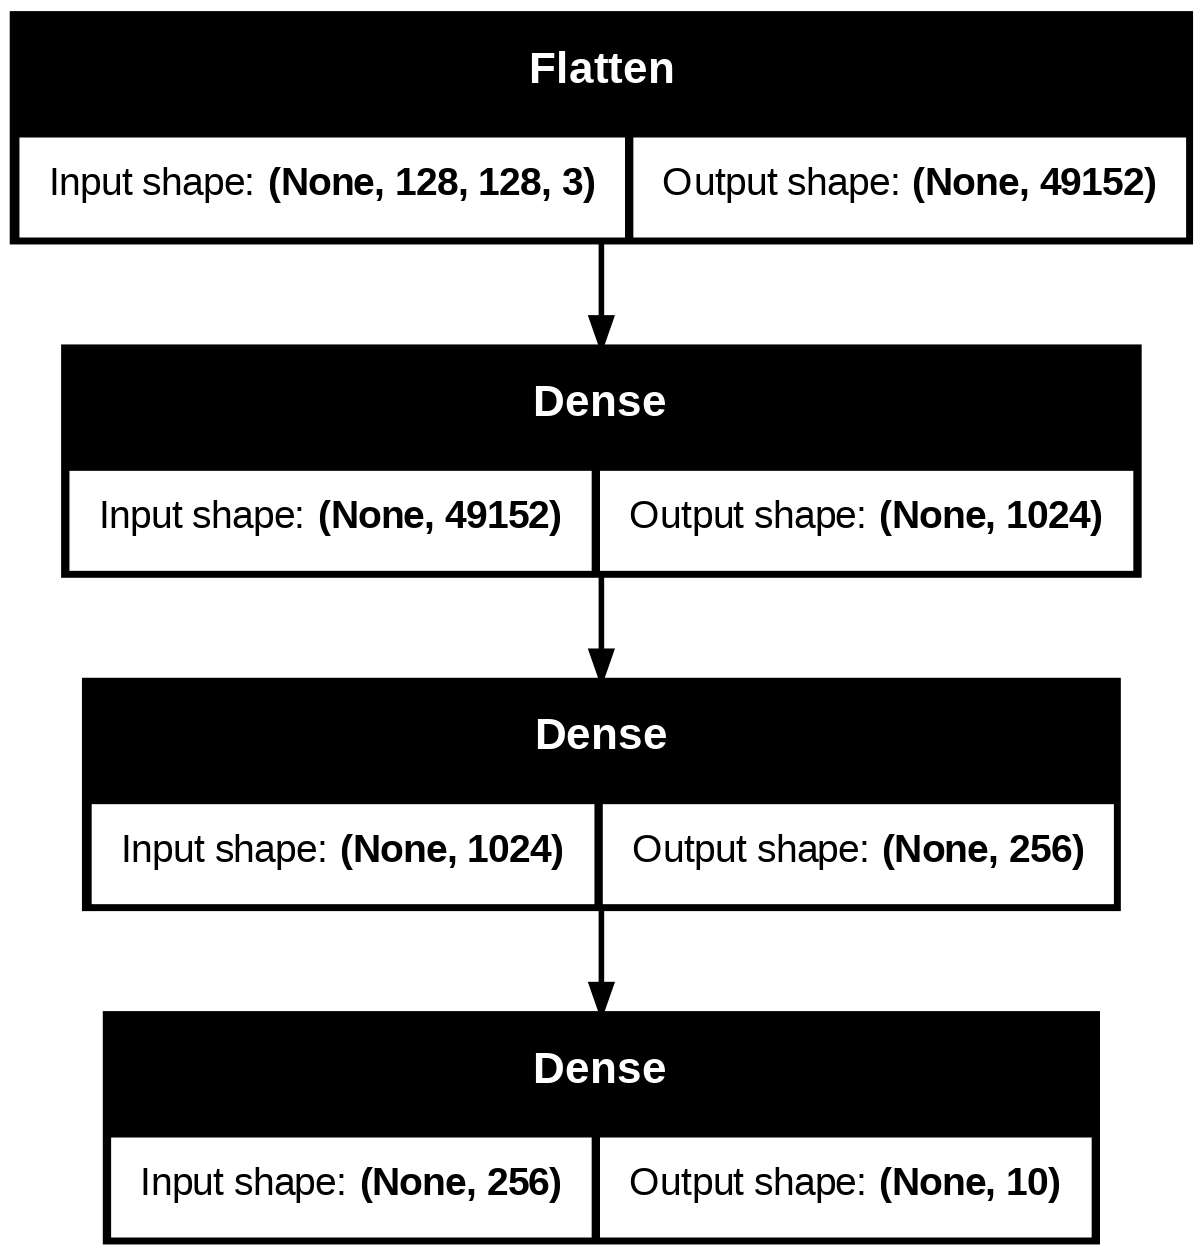

In [14]:
tf.keras.utils.plot_model(model, to_file = "model_ann.png", show_shapes=True)

In [15]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [16]:
epochs = 10
model_fit = model.fit(train_ds, validation_data=val_ds, epochs = epochs)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.1880 - loss: 26.7048 - val_accuracy: 0.3607 - val_loss: 2.5506
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3567 - loss: 2.4159 - val_accuracy: 0.3988 - val_loss: 2.0142
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.4024 - loss: 1.9692 - val_accuracy: 0.3636 - val_loss: 1.8633
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4347 - loss: 1.8299 - val_accuracy: 0.3842 - val_loss: 2.3072
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.4488 - loss: 1.7336 - val_accuracy: 0.4692 - val_loss: 1.6258
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.5116 - loss: 1.5535 - val_accuracy: 0.3959 - val_loss: 1.7358
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5118 - loss: 1.5396 - val_accuracy: 0.4135 - val_loss: 1.8081
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.5056 - loss: 1.5026 - val_accuracy: 0.3930 

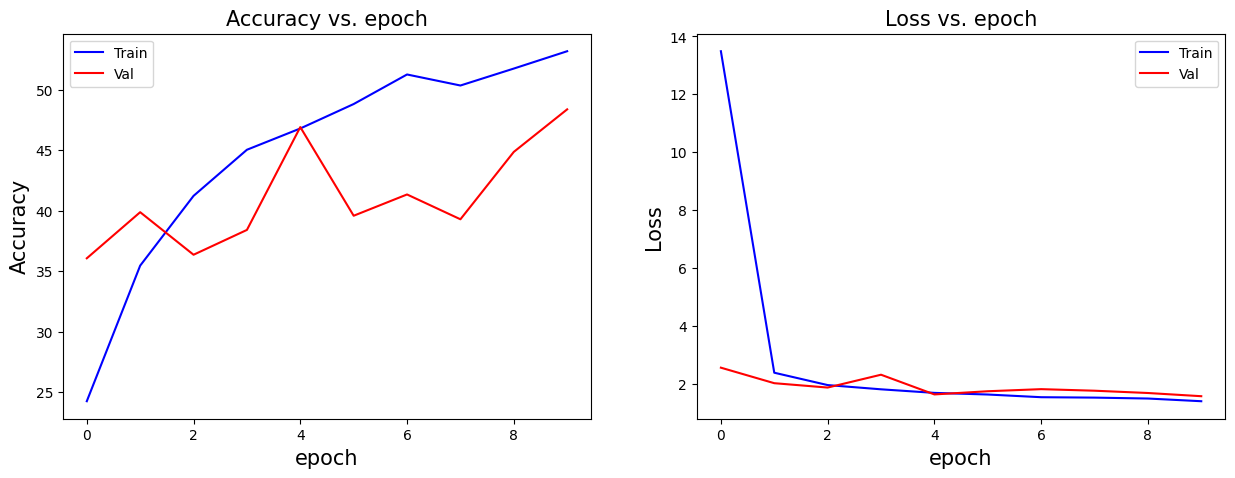

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [18]:
# run model rediction and obtain probabilities
y_pred = model.predict(test_ds)

# get list of predicted classes by taking argmax of the probabilitities(y_pred)
predicted_categories = tf.argmax(y_pred, axis=1)

# get list of class names
class_names = test_data.class_names

# create list of all "y"s labels, by iterating over test dataset
true_categories = tf.concat([y for x,y in test_ds], axis = 0)

# calaculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories)*100
print(f'\n Test Accuracy: {test_acc:.2f}%\n')


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step

 Test Accuracy: 35.48%



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


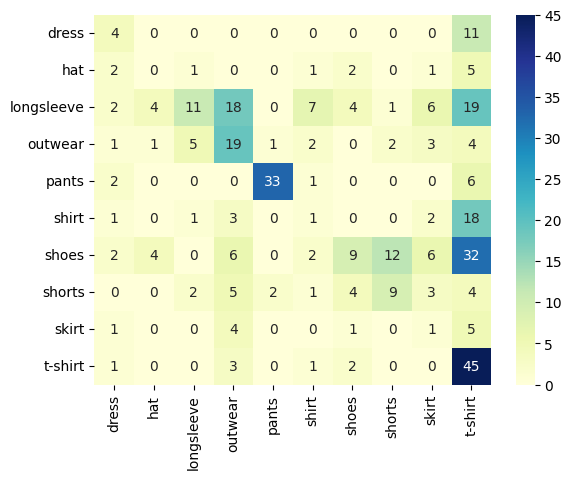

In [19]:
def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    # run model prediction and obtain probabilities
    y_pred = model.predict(ds)
    # get list of predicted classes by taking argmax of the probabilities(y_pred)
    predicted_categories = tf.argmax(y_pred, axis=1)
    # create list of all "y"s labels, by iterating over test dataset
    true_categories = tf.concat([y for x, y in ds], axis=0)
    # generate confusion matrix and plot it
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

ConfusionMatrix(model, test_ds, test_data.class_names)

In [20]:
# function to plot image given image, its true label and class probabilities (pred_array)
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                class_names[true_label]),
                                color=color)

# function to plot barplot of class probabilities (pred_array)
def plot_value_array(pred_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(pred_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


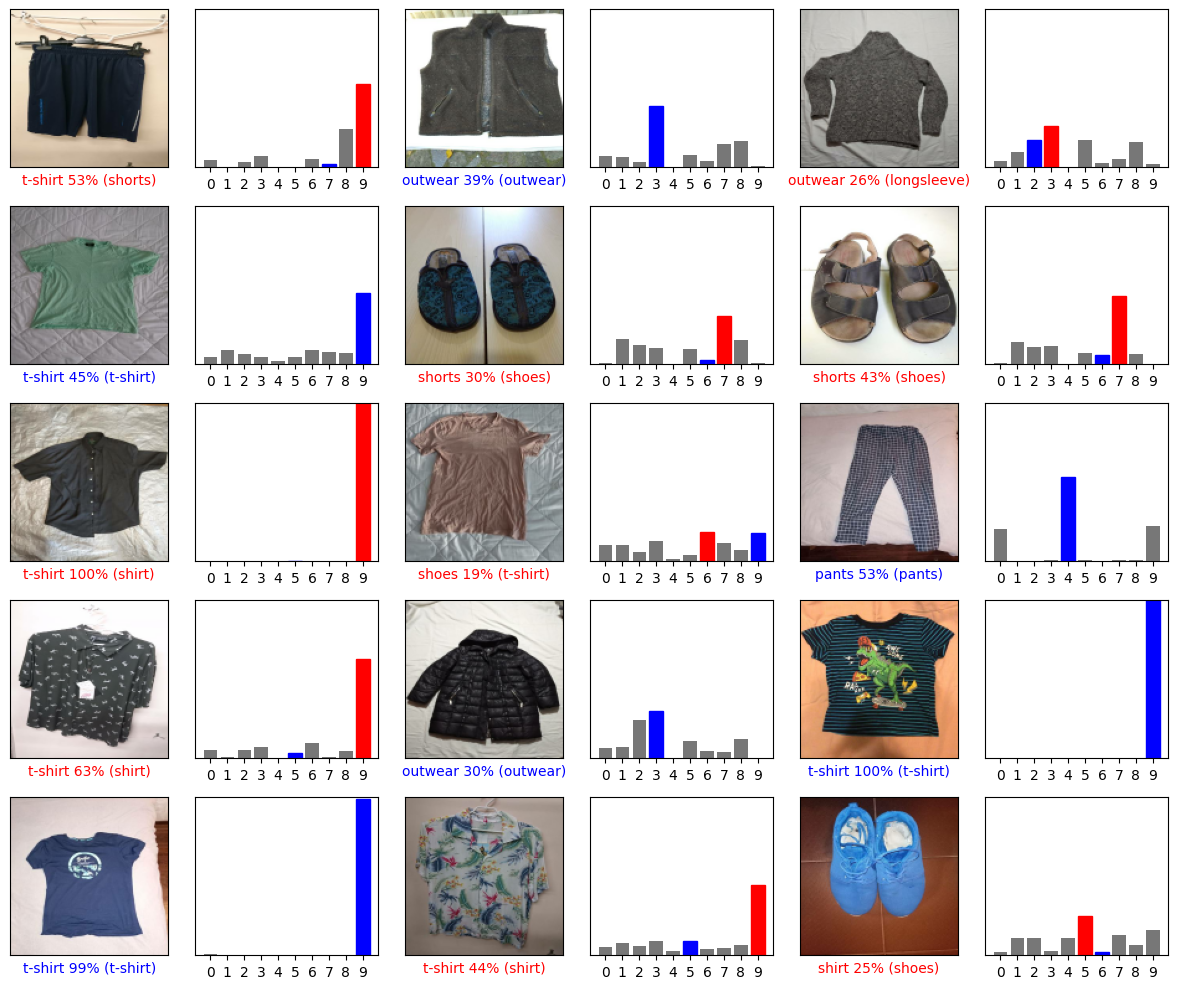

In [21]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(y_pred[index], true_categories[index], images[index])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(y_pred[index], true_categories[index])
plt.tight_layout()
plt.show()

In [22]:
num_classes = 10
hidden_size = 256

model = keras.Sequential(
    name = "model_cnn",
    layers = [
        layers.Conv2D(filters=16, kernel_size = 3, strides = 1, padding = "same", activation = 'relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units=hidden_size, activation='relu'),
        layers.Dense(units = num_classes, activation='softmax')
        ]
)

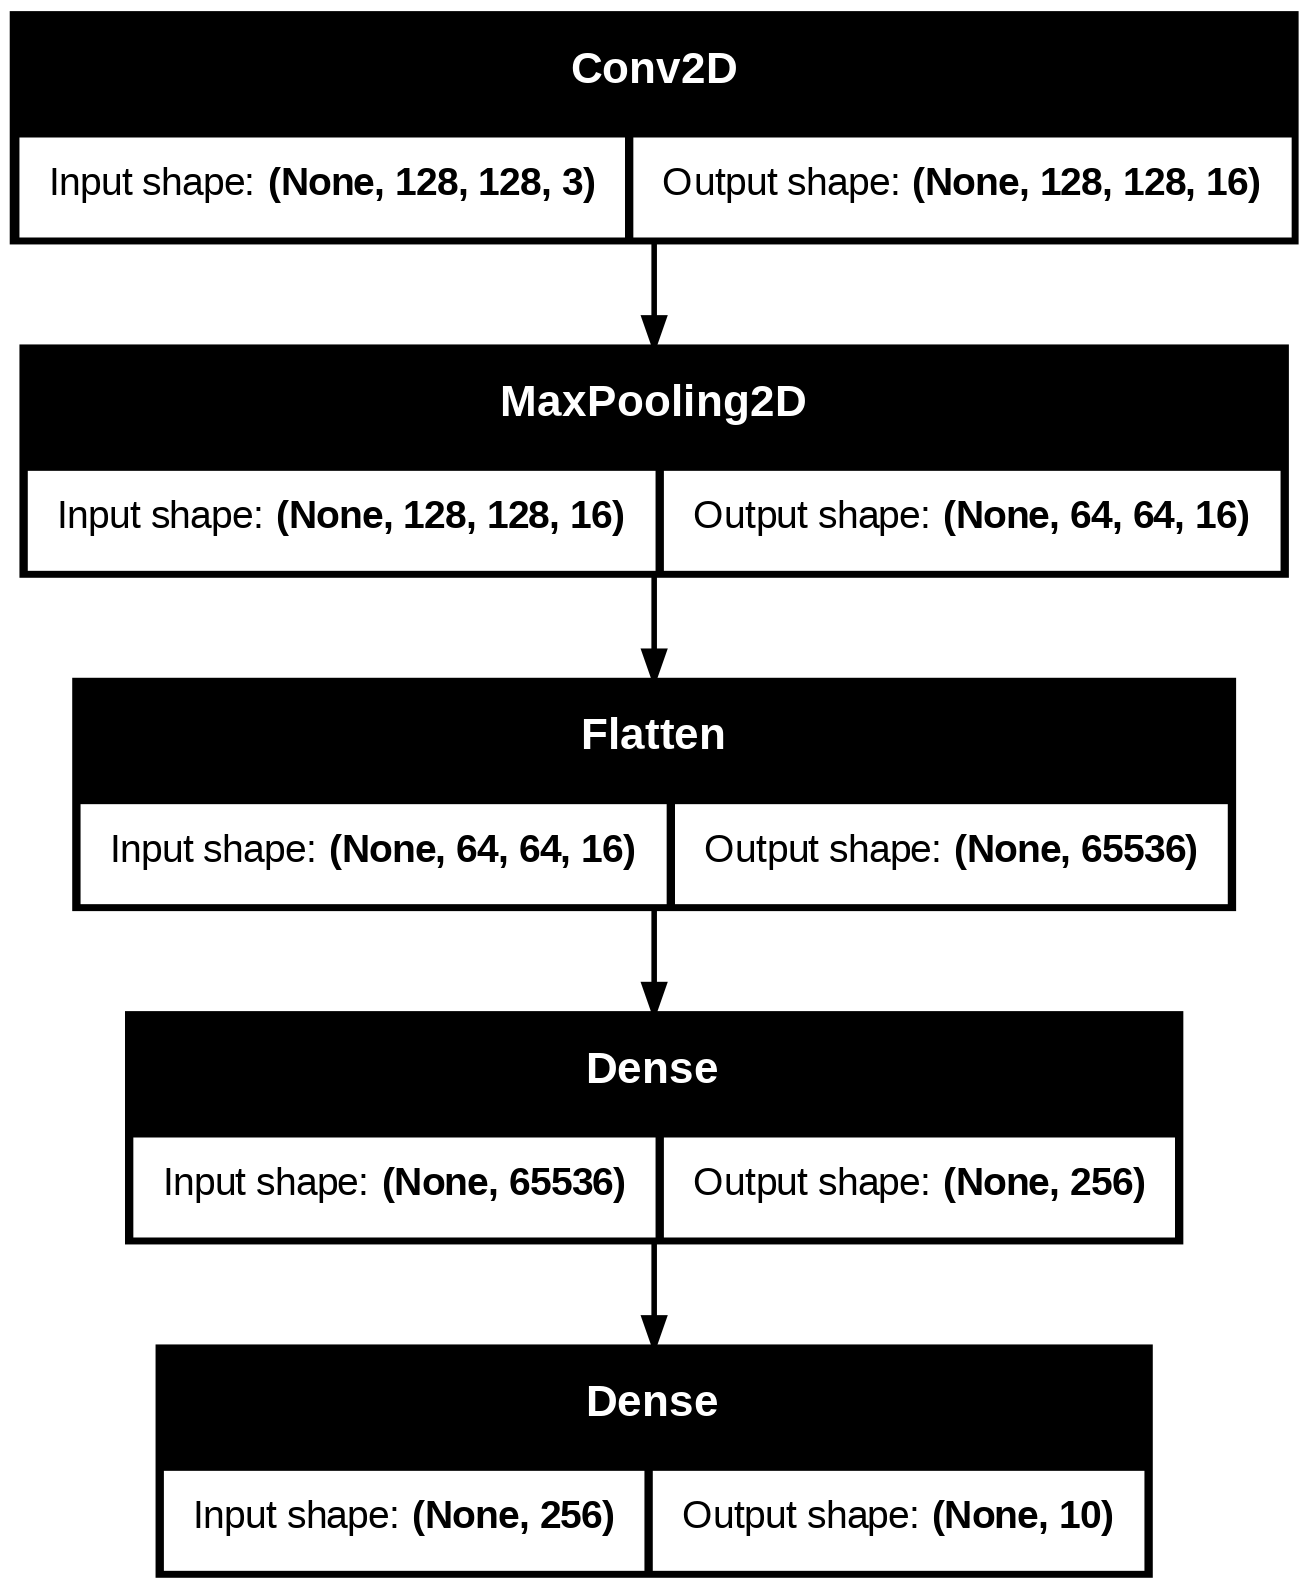

In [23]:
tf.keras.utils.plot_model(model, to_file = "model_cnn.png", show_shapes = True)

In [24]:
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,780,490 (64.01 MB)

 Trainable params: 16,780,490 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
epochs = 10
model_fit = model.fit(train_ds, validation_data=val_ds, epochs = epochs)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.2499 - loss: 7.5015 - val_accuracy: 0.3959 - val_loss: 1.9944
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.4560 - loss: 1.6940 - val_accuracy: 0.4927 - val_loss: 1.6268
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.5683 - loss: 1.3448 - val_accuracy: 0.4839 - val_loss: 1.5611
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.6512 - loss: 1.0669 - val_accuracy: 0.5396 - val_loss: 1.4817
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7431 - loss: 0.8261 - val_accuracy: 0.5630 - val_loss: 1.4028
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.8307 - loss: 0.6134 - val_accuracy: 0.5337 - val_loss: 1.5251
Epoch 7/10
25/96 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9068 - loss: 0.4332

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))
ax = axes.ravel()

# accuracy graph
ax[0].plot(range(0, model_fit.params['epochs']), [acc*100 for acc in model_fit.history['accuracy']], label='Train', color = 'b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize = 15)
ax[0].set_ylabel('Accuracy', fontsize = 15)
ax[0].set_xlabel('epoch', fontsize = 15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis = 0)
images = tf.concat([x for x,y in test_ds], axis = 0)
y_pred = model.predict(test_ds)
class_names = test_data.class_names
predicted_categories = tf.argmax(y_pred, axis=1)

test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


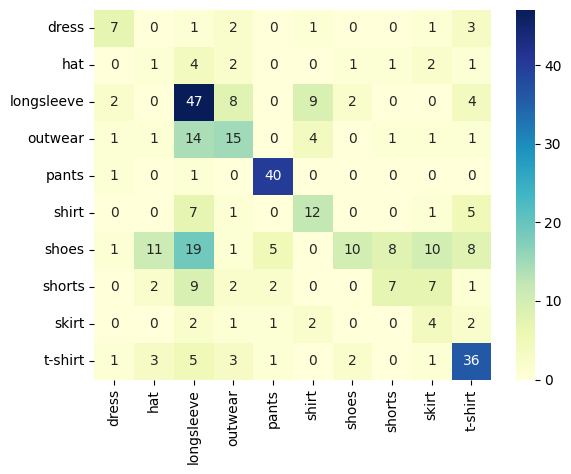

In [30]:
ConfusionMatrix(model, test_ds, test_data.class_names)

In [34]:
print(test_ds)

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


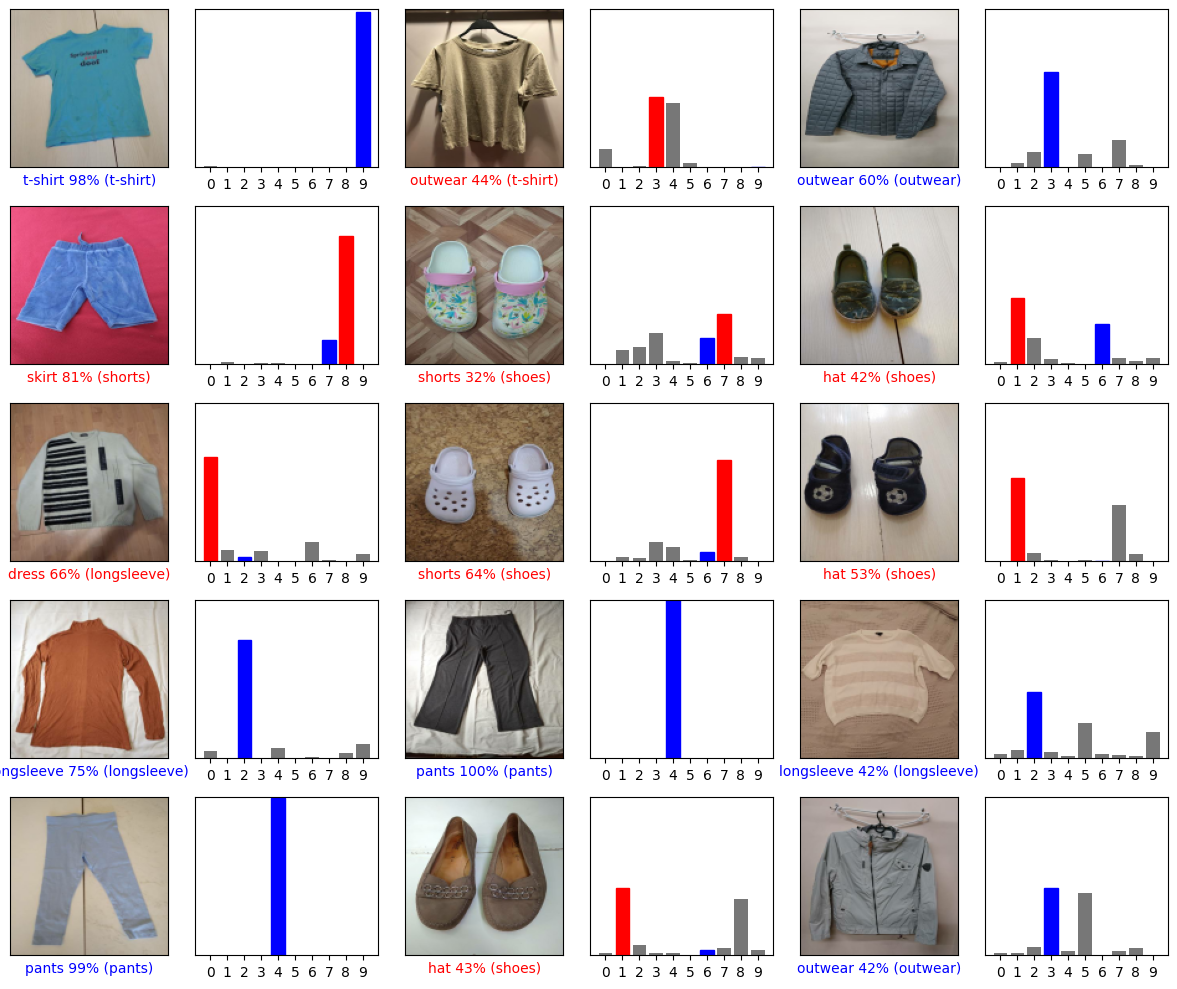

In [35]:
true_categories = tf.concat([y for x,y in test_ds], axis = 0)
images = tf.concat([x for x,y in test_ds], axis = 0)
y_pred = model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and true labels.
indices = random.sample(range(len(images)), 15)
# Color correct prediction in blue and incorrect prediction in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(y_pred[index], true_categories[index], images[index])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(y_pred[index], true_categories[index])
plt.tight_layout()
plt.show()

In [36]:
# Downloading the image
!gdown 1TE-0GfSsWXaau_sMwO5_RgB84SSylOyk

Downloading...
From: https://drive.google.com/uc?id=1TE-0GfSsWXaau_sMwO5_RgB84SSylOyk
To: /content/cycle_people.png
100% 16.2k/16.2k [00:00<00:00, 53.0MB/s]


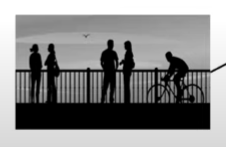

In [37]:
# importing necessary ;ibraries
import cv2
from google.colab.patches import cv_imshow

# Reading the image file using OpenCV
img = cv2.imread('/content/cycle_people.png')

# Displaying the input image
cv_imshow(img)

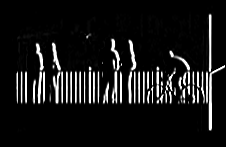

In [38]:
# Apply the Sobel filter

# The ddpeth parameter specifies the desired depth of the output image. In this case, it is set to 64-bit floating point values.
# dx and dy parameters specify the order of derivative to be taken in the x and y directions respectively.
# kzise parameter specifies the size of the Sobel filter
output = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)

# Displaying the output image
cv_imshow(output)

Let's take an example of grayscale or 2d or  1-channel Input Image and a given 3x3 kernel -
- Here **10 denotes a bright pixel while 0 denotes a dark one**
- Let's now convolve the kernel on the Image to see what we get as output:

><img src='https://drive.google.com/uc?id=1Nmco7hrrBxtSkpzCXi0Lji3uOjCerLnc' height=400>

- See how the **top element of the kernel captures brighter pixels** and the **darkest pixels can be captured by the bottom elements**

- Now we will convolve or traverse the kernel to each of the selected region **(highlighted in pink in image above)**

- **multiply each element to the kernel/filter element** and then **sum them all**

- the **value comes out to be 0** which forms the first element of the output matrix.   

- Now the **kernel then shifts one column to the right** and again computes the operation. The amount of shifting is also called `stride`. In this case the stride is 1 both in horizontal and vertical direction. If the kernel shifted by two column towards right and only one towards botton, stride would have been (2,1).

- Notice **after some computing**, the **output matrix was able to detect the horizontal line** which separated the bright and dark object.

- Also this **shifting of kernel/filter help make the image translation invariant** as **no matter where the horizontal line is**, the **output matrix will have the same pixel values for the horizontal lines.**  

In [39]:
layers.Conv2D(filters = 48, kernel_size = 3, strides=1, padding="same", activation='relu', input_shape=(128,128,3))

<Conv2D name=conv2d_1, built=False>